In [ ]:
# This is how I read the dataset before saving if on my system to have a copy. 
import pandas as pd
fuel_data = ("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")
fuel_data_df = pd.read_csv(fuel_data)
fuel_data_df.head()

In [ ]:
#saving the dataset on the system as an excel file
fuel_data_df.to_excel(r"/Users/RASHY/Documents/fuel_data.xlsx",index=False)

In [33]:
#importing all the libraries that might be necessary
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rc('figure', figsize=(20, 10)) #to make all my graphs the same size

In [2]:
#reading of dataset from my system
fuel_data_df = pd.read_excel("/Users/RASHY/Documents/fuel_data.xlsx")
fuel_data_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


## Data Wrangling 

In [3]:
#the view the details of the data
fuel_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null int64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


In [4]:
#to get more clarity about the number of rows and columns
fuel_data_df.shape

(29523, 11)

In [5]:
#to know the size of the dataset
fuel_data_df.size

324753

In [6]:
fuel_data_df.ndim

2

In [7]:
#to check if there is are missing values in each column
fuel_data_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [8]:
#to see the list of columns and also to know what datatype they fall into
fuel_data_df.columns
#they are all strings

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [9]:
#optional 
#it is not necessary for this analysis
condition = fuel_data_df["fuel_unit"] == "mcf"

In [10]:
#to know the value that occurs most in the column **fuel_unit**
fuel_data_df["fuel_unit"].describe(include = "all")

count     29343
unique        9
top         mcf
freq      11354
Name: fuel_unit, dtype: object

In [11]:
#to replace the missing value with the highest value that occur most in the column **fuel_unit**
fuel_data_df["fuel_unit"] = fuel_data_df["fuel_unit"].fillna(value="mcf")
#note - the missing values can also be replaced with fillna(0), to make the values zero
# there are other ways to replace missing values to make the analysis accurate

In [12]:
#to confirm if the missing values have been replaced
fuel_data_df["fuel_unit"].isnull().sum()

0

In [13]:
#optional
#still to confirm if the data is clean
fuel_data_df.loc[fuel_data_df.isnull().any(axis=1)].head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [14]:
# to view all the information of the data such as min, max, count,percentile e.t.c
fuel_data_df.describe(include = "all")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29523,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2008_12_159_0_15,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11534,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
# since the data is clean to some extent, we can now ask the right question. However, less view the heatmap first

## Data Visualization

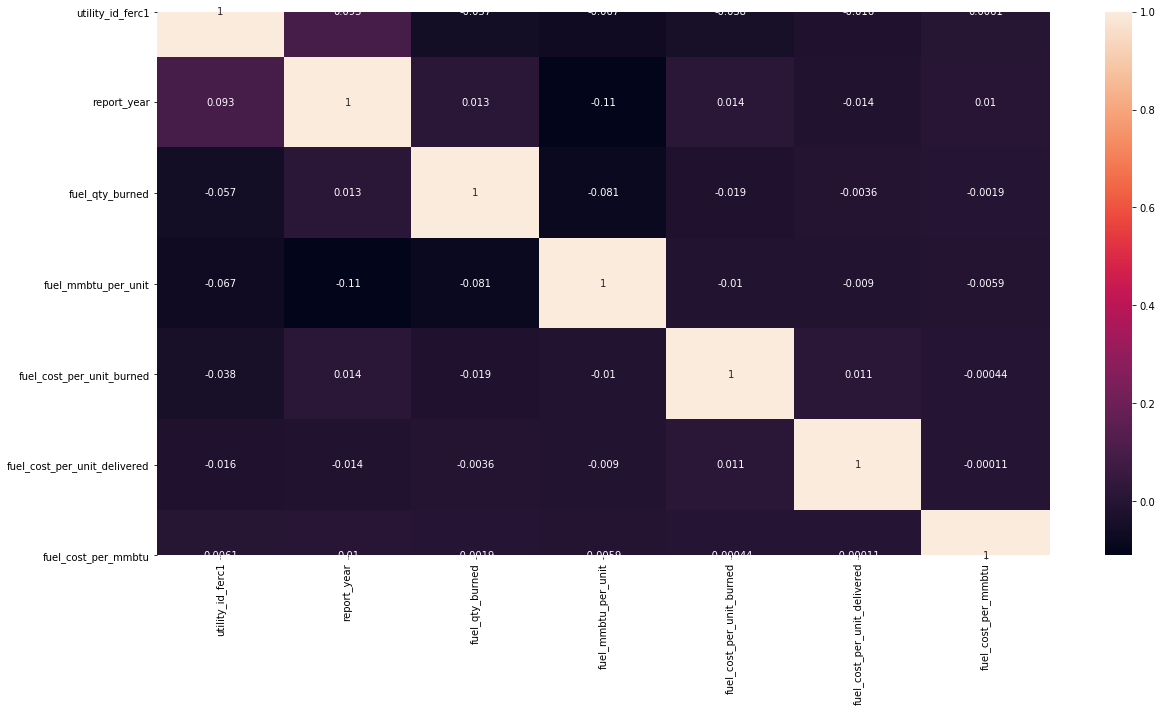

In [34]:
#to display the heatmap of the dataset
#this enable us to know the relationship of the columns to eachother
sns.heatmap(fuel_data_df.corr(), annot=True)

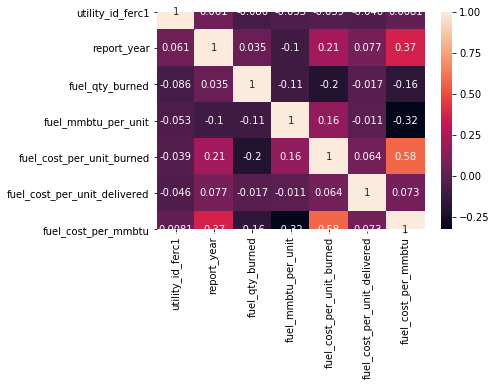

In [18]:
#taking random data of 500 and check the heatmap
sample_df = fuel_data_df.sample (n=500, random_state = 4)
sns.heatmap(sample_df.corr(), annot=True)

## How popular is a fuel type 

In [19]:
fuel_data_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [31]:
fuel_type_popular[["fuel_type_code_pudl","fuel_cost_per_unit_burned"]] = fuel_data_df.groupby("fuel_type_code_pudl").mean()
fuel_type_popular.head()

ValueError: ['fuel_type_code_pudl' 'fuel_cost_per_unit_burned'] not contained in the index

In [20]:
fuel_type_popular = fuel_data_df.groupby("fuel_type_code_pudl")["fuel_type_code_pudl"].count()
fuel_type_popular.head()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
Name: fuel_type_code_pudl, dtype: int64

In [21]:
#method 1
fuel_type_popular_new= pd.DataFrame(fuel_type_popular)
fuel_type_popular_new.head()

,fuel_type_code_pudl
fuel_type_code_pudl,
coal,8547
gas,11486
nuclear,818
oil,8064
other,167


In [22]:
fuel_type_popular_new.rename(columns={"fuel_type_code_pudl":"count"},inplace=True)
fuel_type_popular_new.sort_values(["count"],ascending=True,inplace=True)
fuel_type_popular_new.head()

,count
fuel_type_code_pudl,
other,167
waste,441
nuclear,818
oil,8064
coal,8547


In [ ]:
#fuel_data_df.groupby("fuel_type_code_pudl")["fuel_unit"].value_counts()

In [23]:
for name,hex in matplotlib.colors.cnames.items():
    print(name,hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [26]:
fuel_colors = {"gas":"darkviolet","coal":"deeppink","oil":"dimgray","nuclear":"firebrick","waste":"floralwhite","other":"forestgreen"}

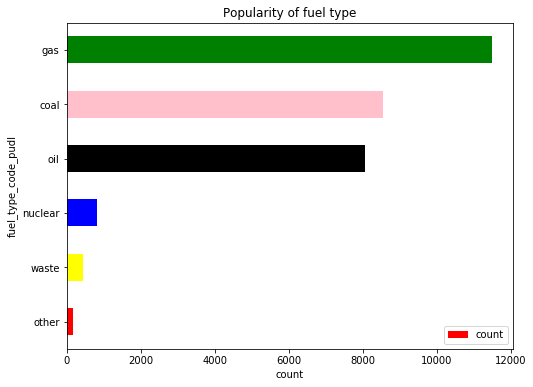

In [24]:

fuel_type_popular_new.plot(kind="barh",y="count",figsize=(8,6), color = ["red",
                                                                        'yellow',"blue","black","pink","green"])
plt.title("Popularity of fuel type")
plt.xlabel("count")
plt.show()

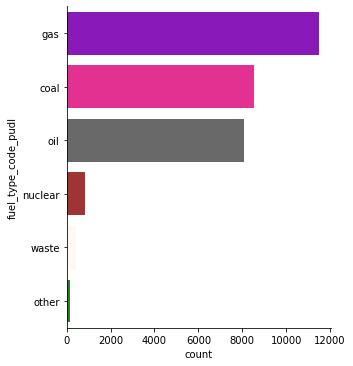

In [27]:
#method 2 using seaborn
sns.catplot(y='fuel_type_code_pudl',
           kind="count",data=fuel_data_df,palette=fuel_colors,order=fuel_data_df['fuel_type_code_pudl'].value_counts().index)

AttributeError: 'str' object has no attribute 'loc'